## Aula 16 - Estatística pt1 - Definições

- 1. Introdução
- 2. Probabilidade
- 3. Distribuições de probabilidade

### Problema gerador: em um jogo da Copa do Mundo de futebol, a quantidade média de gols é aproximadamente 3. Assim sendo, qual é a probabilidade de em determinada partida não haver gols ? E a probabilidade de haver 4 gols ?

In [1]:
dados = '''
Uruguay 1930 FIFA World Cup -- 4.375

Italy 1934 FIFA World Cup -- 4.12

France 1938 FIFA World Cup -- 4.67

Brazil 1950 FIFA World Cup -- 4

Switzerland 1954 FIFA World Cup -- 5.38

Sweden 1958 FIFA World Cup -- 3.6

Chile 1962 FIFA World Cup -- 2.79

England 1966 FIFA World Cup -- 2.79

Mexico 1970 FIFA World Cup -- 2.97

West Germany 1974 FIFA World Cup -- 2.55

Argentina 1978 FIFA World Cup -- 2.68

Spain 1982 FIFA World Cup -- 2.81

Mexico 1986 FIFA World Cup -- 2.54

Italy 1990 FIFA World Cup -- 2.21

United States 1994 FIFA World Cup -- 2.71

France 1998 FIFA World Cup -- 2.67

South Korea and Japan 2002 FIFA World Cup -- 2.52

Germany 2006 FIFA World Cup -- 2.30

South Africa 2010 FIFA World Cup -- 2.27

Brazil 2014 FIFA World Cup -- 2.67

Russia 2018 FIFA World Cup -- 2.64

Qatar 2022 FIFA World Cup --  2.69'''

In [2]:
media_de_gols = [float(x.split(' -- ')[1])for x in dados.split('\n\n')]

In [3]:
import numpy as np

np.array(media_de_gols).mean()

3.0888636363636364

## Introdução

A probabilidade e estatística podem ser divididas nos seguintes três pilares:

- **Probabilidade**: É a teoria matemática utilizada para se estudar a incerteza oriundas de `fenômenos` de caráter aleatório

- **Estatística Descritiva**: Etapa inicial da análise estatística, tendo como objetivo tirar informações prévias de modo informal e direto. A ideia é obter informações que `resumam` o conjunto de dados, a fim que estes possam ser `descritos`, e conclusões iniciais possam ser tiradas.

- **Inferência Estatística**: É o conjunto de técnicas que possibilitam a extrapolação de conclusões tiradas a partir de um conjunto pequeno de dados (denominado `amostra`) para todo universo sob análise (denominado (`população`))

## 1.1) Tipos de Variáveis

 - **Variável qualitativa** nominal
 > Valores que expressam **Atributos sem nenhum um tipo de ordem**. Ex.: sexo, estado cívil, pais de origem, ser fumante ou não, etc.
 
-São representados por strings, ou possívelmente números inteiros

- **Variável qualitativa ordinal**
> Valores que expressam **atributos com algum tipo de ordem ou grau**. Ex: escolaridade, resposta deu um paciente (pior, igual, melhora), classe social(alta, média, baixa), classe do navio, etc.

-São representados por strings, ou possívelmente números inteiros

- **Variável quantitativa** discreta
> Valores numéricos inteiros. Ex: idade em anos inteiros, número de banheiros em uma casa, número de filhos, etc.

-São representados por ints

- **Variável quantitativa** contínua
> Valores numéricos racionais: Ex.: salário,preço, temperatura, gorjeta, etc.

-São representados por floats

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from Func_estatdesc import *

## 2) Probabilidade
Probabilidade é a área da matemática que estuda **eventos aleatórios**, cujos resultados são **probabilísticos** ou **estocásticos**

Existem poucos sistemas na natureza que são de fato inerentemente aleatórios e não-determinísticas. No entanto, uma descrição determinística pode ser muito complicada, de modo que **se torna conveniente** tratar o sistema como um sistema estocástico.

Ex.: lançamento de moeda, lançamento de dados, etc.

O objetivo da estatística é similar: analisar dados ou criar modelos que **generalizem relações** que não podem ser determinadas diretamente uma vez que não temos acesso à população. Neste sentido, há muita probabilidade envolvida em estatística, e é por isso que vamos olhar para os principais conceitos de probabilidade.

## 2.1) **Variável Aleatória**

Uma **variável aleatória** é uma variável cujo o valor depende de fatores **não-deterministicos**, isto é, **probabilisticos**.

**Exemplo**: resultado do lançamento de um dado; o quanto de gorjeta será dado num restaurante, sobrevivência ao Titanic.

## 2.2) **Espaço Amostral**

chamamos de **Espaço amostral** o conjunto de **todos os resultados possíveis de um certo fenômeno aleatório**, ou seja, **os valores possíveis que a variável aleatória de interesse pode assumir**. Representamos o espaço amostra pela letra grega $\Omega$. 

Os subconjuntos de $\Omega$ são denominados **eventos** e representados pelas letras latinas maiúsculas A, B, etc. 

**Exemplo**: o espaço amostral dos resultados do lançamento de um dado é:

$$ \Omega = \{1, 2, 3, 4, 5, 6\} $$

Alguns eventos possíveis são:

- Evento A = {3} : o resultado do lançamento do dado foi 3;
- Evento B = {5} : o resultado do lançamento do dado foi 5.


In [8]:
df_titanic = pd.read_csv('train.csv', na_values='?')

In [12]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
print(df_titanic.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [41]:
# Verificando o tipo da coluna 
df_titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
# Verificando valores unicos Variável PClass
df_titanic['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [45]:
# Verificando valores unicos Variável Survived
df_titanic['Survived'].unique()

array([0, 1], dtype=int64)

In [46]:
# Veiricando valores únicos variável embarked
df_titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [47]:
# Difinindo o espaço amostral para idade 
df_titanic['Age'].unique()


array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [48]:
# Tratando a coluna Ticket
df_titanic['Ticket'] = df_titanic['Ticket'].apply(limpar_string)


### 2.4) Definição de probabilidade

Definimos uma função $P(.)$ denominada **probabilidade** que deve satisfazer as seguintes propriedades:
    
- $0\leq P(A) \leq 1$ 

- $ P(\Omega)=\sum_{A_i \in \Omega}P(A_{i})=1$

**Exemplo**: considere o lançamento de uma moeda honesta:

O espaço amostral é: $\Omega = \{ K, C \}$.

Pra uma moeda honesta, temos $P(K) = P(c) = \frac{1}{2}$.

De fato, note como $0 \leq P(A) \leq 1$. E, além disso,

$$ P(\Omega) = \sum_{A_i \in  \{ K, C \}}P(A_{i}) = P(K) + P(C) = \frac{1}{2} + \frac{1}{2} = 1 $$

#### 2.4.1) Atribuindo probabilidades aos elementos do espaço amostral

Há, essencialmente, duas formas de se **atribuir a probabilidade de cada evento**:

> 1) Baseando-se em características teóricas acerca do experimento.

**Exemplo**: ao lançarmos um dado, temos o espaço amostral $\Omega=\{1,2,3,4,5,6\}$.

Admitindo que o dado foi construído de forma homogênea e com medidas rigorosamente simétricas, não temos nenhuma razão para **privilegiar uma face em detrimento das demais**.

Assim, consideramos: $p(1) = p(2) = p(3) = p(4) = p(5) = p(6) = \frac{1}{6}$ 

> 2) Fazendo muitos experimentos.

**Exemplo**: imagine que temos uma moeda não-honesta, que tende cair mais vezes coroa do que cara. Para descobrirmos qual é a probabilidade de cada um dos eventos ($\Omega = \{K, C\}$), podemos lançar a moeda muitas vezes, e anotar os resultados:

In [50]:
n = 10000
cara = 5847
coroa = n - cara

print(cara, coroa)

5847 4153


In [51]:
p_cara = cara / n
p_coroa = coroa / n

print(p_cara, p_coroa)

0.5847 0.4153


In [55]:
pd.Series(np.random.randint(0,2,10000000)).value_counts(normalize=True)

0    0.500148
1    0.499852
Name: proportion, dtype: float64

No caso do Titanic, podemos atribuir probabilidades de acordo com as **observações coletadas**

isso é facilmente calculado com o `value_counts()`

In [57]:
df_titanic['Pclass'].value_counts(normalize=True)

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

#### 2.4.2) Eventos complementares

A probabilidade de ocorrência de um evento pode ser definida diretamente pela probabilidade de **não ocorrência dele**: $ A^{c}$ é a não ocorrência de $A$, de modo que, naturalmente, $ P(A) = 1 - P(A^{c})$

Ou seja, $P(A) + P(A^{c}) = 1$, o que faz sentido, segundo a definição de probabilidade!

Quando temos um espaço amostral de apenas dois elementos (lançamento de uma moeda, ou a sobrevivência ao Titanic, por exemplo), isso fica ainda mais evidente:

In [58]:
df_titanic['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [59]:
df_titanic['Survived'].mean()

0.3838383838383838

### 2.5) Probabilidade Condicional e Independência

Utilizamos a notação $P(A|B)$ pra indicar a **probabilidade condicional de A dado B**, ou seja, probabilidade do evento $A$ ocorrer, dado que ocorreu o evento $B$.

Se os eventos $A$ e $B$ forem **dependentes**, temos que a ocorrência de $B$ influencia a ocorrência de $A$, ou seja, $P(A|B) \neq P(A)$.

**Eventos independentes** são tais que $P(A|B) = P(A)$, ou seja, a ocorrência do evento $B$ não influencia a probabilidade de ocorrência do evento $A$.

> No caso do Titanic: a **classe** influencia na **sobrevivência**?

In [60]:
df_titanic['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [62]:
df_titanic.query('Pclass == 1')['Survived'].value_counts(normalize=True)

Survived
1    0.62963
0    0.37037
Name: proportion, dtype: float64

In [64]:
df_titanic.groupby('Pclass')[['Survived']].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


## 3) Distribuições de probabilidade

Uma **distribuição de probabilidade** é uma função que descreve o comportamento aleatório de um fenômeno dependente do acaso.

A distribuição de probabilidade pode **modelar incertezas** e descrever fenômenos físicos, biológicos, econômicos, entre outros.

Para representar a distribuição matematicamente, frequentemente utilizamos a [função densidade de probabilidade](https://en.wikipedia.org/wiki/Probability_density_function). Esta função é tal que a probabilidade da variável aleatória cair em uma faixa particular é dada **pela integral da densidade dessa variável sobre tal faixa** - isto é, é dada pela área abaixo da função densidade mas acima do eixo horizontal e entre o menor e o maior valor dessa faixa.

<img src="https://work.thaslwanter.at/Stats/html/_images/PDF.png" width=400>


Quando estamos trabalhando com uma amostra de dados, sobretudo de variáveis numéricas, é comum visualizarmos a distribuição dos valores amostrais, como sendo a ocorrência de cada um dos valores do espaço amostral que foram observados na amostra.

Agora entendemos que, ao visualizar uma distribuição, estamos visualizando a probabilidade de determinados valores serem observados, de acordo com o que de fato foi observado na amostra!

In [65]:
df_titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

c:\Users\Matheus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


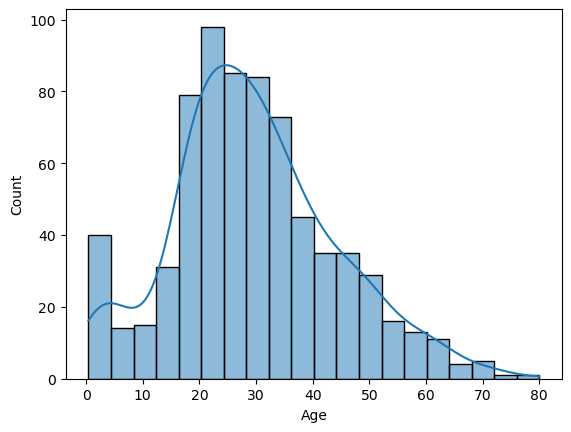

In [71]:
sns.histplot(data=df_titanic, x='Age', kde=True);

E agora entendemos um pouco mais o KDE (kernel **density** estimate). Nome como o eixo y muda de `Count` para `Density`, de modo que a área total sob a curva seja 1!

c:\Users\Matheus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


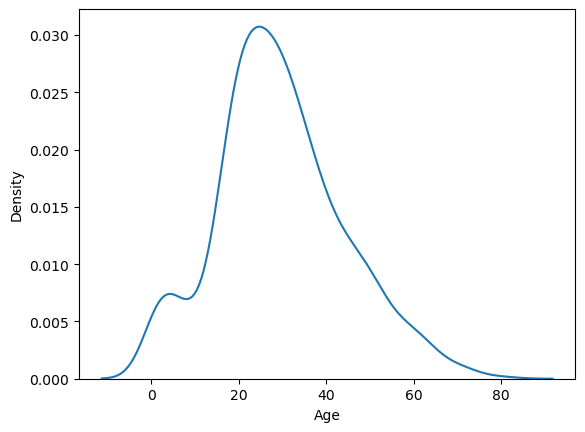

In [70]:
sns.kdeplot(data=df_titanic, x='Age');
plt.show()

Interpretações:
- Se pegarmos uma pessoa ao acaso, temos uma grande chance de ela ter entre 20 a 40 anos 
- Se pegarmos uma pessoa ao acos, temos uma pequena chave de ela ter 80 anos ou mais 

A chance = probilidade é a área sob a curva

### **3.1) Distribuição de Bernoulli**

Muitos experimentos são tais que os resultados **apresentam ou não** uma determinada característica. Por exemplo:

- Uma moeda é lançada: o resultado ou é cara ou não é (ocorrendo, então, coroa);
- Uma peça escolhida ao acaso de um lote: essa peça ou é defeituosa ou não é;
- Um passageiro do Titanic escolhido ao acaso: sobreviveu ou morreu?

Em todos esses casos estamos interessados na ocorrência de sucesso (cara, peça não defeituosa, etc.) ou fracasso (coroa, peça defeituosa, etc.). 

Para cada experimento acima, podemos definir uma V.A. $X$ que assume apenas dois valores: 1, se ocorrer sucesso e 0, se ocorrer fracasso. Indicaremos por $p$ a probabilidade de sucesso.

**Definição:**

A variável aleatória $X$, que assume apenas valores 0 e 1 com função de probabilidade $(X, p(X))$ é dita variável aleatória de Bernoulli tal que:

- $p(0) = P(X=0) = 1-p$

- $p(1) = P(X=1) = p$

Usaremos a notação $X \sim Ber(p)$ para indicar uma V.A. com distribuição Bernoulli de parâmetro $p$.

> Esta é uma **distribuição de probabilidade discreta**, uma vez que o espaço amostral é discreto -- havendo, inclusive, apenas dois valores possíveis: 0 ou 1.

In [95]:
import scipy # Computação científica

In [117]:



import scipy.stats


resultado_bern = scipy.stats.bernoulli.rvs(p=0.5, size=1000)


In [99]:
pd.Series(resultado_bern).value_counts(normalize=True)

0    0.503
1    0.497
Name: proportion, dtype: float64

<Axes: ylabel='count'>

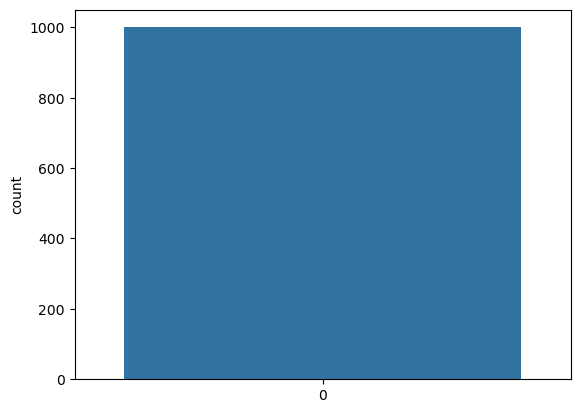

In [100]:
sns.countplot(resultado_bern)

c:\Users\Matheus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

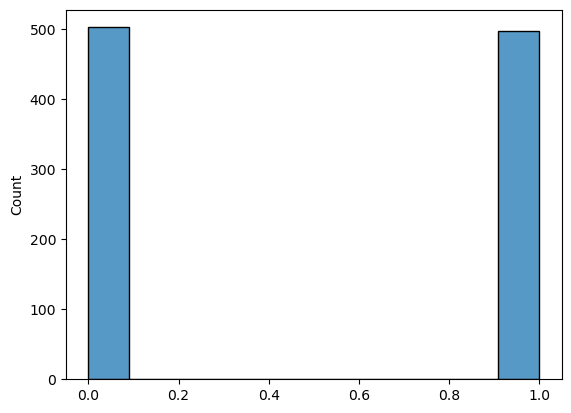

In [91]:
sns.histplot(resultado_bern)

c:\Users\Matheus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Probability'>

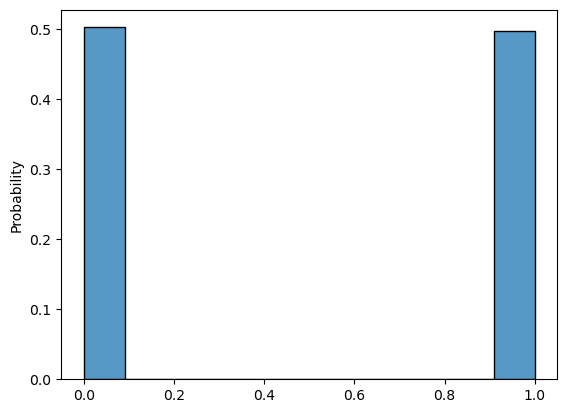

In [101]:
# Trazeno a probabilidade
sns.histplot(resultado_bern, stat='probability')

Para o caso Titanic

In [102]:
df_titanic['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

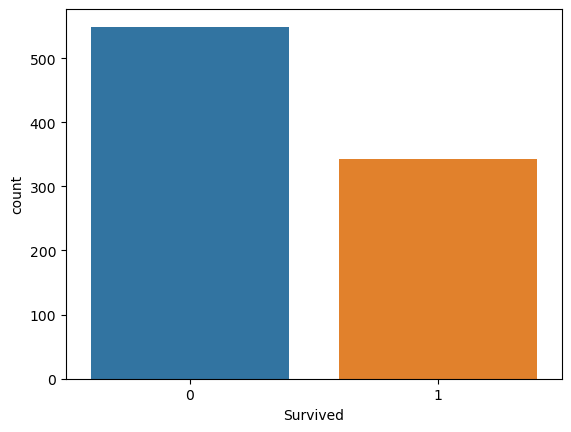

In [103]:
sns.countplot(data=df_titanic, x='Survived')

In [106]:
df_titanic['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

_________

### **3.2) Distribuição de Poisson**


É largamente empregada quando se deseja contar **a quantidade de eventos** de certo tipo que ocorrem num intervalo de tempo ou espaço.

Exemplos:

- Número de chamadas recebidas por um telefone durante 5 minutos;
- Número de falhas de um computador num dia de operação.
- Número de meteoritos maiores que 1 metro de diâmetro que atingem a Terra em um ano;
- O número de chicletes em cada bloco do chão:
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/Chewing_gum_on_a_sidewalk_in_Reykjav%C3%ADk.JPG/220px-Chewing_gum_on_a_sidewalk_in_Reykjav%C3%ADk.JPG">

**Definição**

Dizemos que a V.A. $N$ tem distribuição Poisson com parâmetro $\lambda > 0$ se:

$P(N=k) = \frac{e^{-\lambda}\lambda^k}{k!}, k=0,1,2,...$



#### **Características Importantes**

1. A probabilidade de uma ocorrência é a mesma em todo o intervalo observado;
2. O número de ocorrências em determinado intervalo é independente do número de ocorrências em outros intervalos;
3. A probabilidade de uma ocorrência é a mesma em intervalos de igual comprimento.




> Esta é uma **distribuição de probabilidade discreta**, uma vez que o espaço amostral é discreto, pois estamos interessados em **quantidades inteiras de ocorrência** de determinado evento em um dado intervalo.

#### Exemplo: Delivery

Um restaurante recebe em média: **20 pedidos por hora**. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba **15 pedidos**?

**Qual o número de ocorrências por hora($\lambda$)** ?

In [108]:
l = 20

**Qual o número de ocorrências que queremos obter no período (k) ?**

In [109]:
k = 15

#### Solução 1

In [111]:
import math


In [116]:
round(np.exp(-l)*(l**k)/math.factorial(k),4)

0.0516

#### Solução 2

In [119]:
round(scipy.stats.poisson.pmf(k=k, mu=l),4)

0.0516

In [138]:
experimento = {
    'N_ligacoes' : [],
    'Probabilidade': []
}

In [139]:
k_list = range(30)

for k in k_list:

    p = scipy.stats.poisson.pmf(k =k, mu=l)

    experimento['N_ligacoes'].append(k)
    experimento['Probabilidade'].append(p)

In [141]:
df = pd.DataFrame(experimento)

df.head()

,N_ligacoes,Probabilidade
0,0,2.061154e-09
1,1,4.122307e-08
2,2,4.122307e-07
3,3,2.748205e-06
4,4,1.374102e-05


In [146]:
df['p_formatado'] = df['Probabilidade'].apply(lambda x: f"{x:.9%}")
df.head()

,N_ligacoes,Probabilidade,p_formatado
0,0,2.061154e-09,0.000000206%
1,1,4.122307e-08,0.000004122%
2,2,4.122307e-07,0.000041223%
3,3,2.748205e-06,0.000274820%
4,4,1.374102e-05,0.001374102%


In [150]:
df['prob_acumulada'] = df['Probabilidade'].cumsum().apply(lambda x: f"{x:.9%}")
df.head()

,N_ligacoes,Probabilidade,p_formatado,prob_acumulada
0,0,2.061154e-09,0.000000206%,0.000000206%
1,1,4.122307e-08,0.000004122%,0.000004328%
2,2,4.122307e-07,0.000041223%,0.000045551%
3,3,2.748205e-06,0.000274820%,0.000320372%
4,4,1.374102e-05,0.001374102%,0.001694474%


#### Qual a cara da distribuição ?

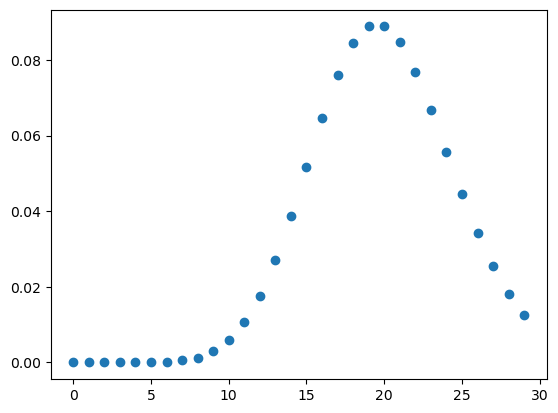

In [153]:
plt.scatter(df['N_ligacoes'], df['Probabilidade'])


### De volta ao poblema gerador!

> Em um jogo da Copa do Mundo de futebol, a quantidade média de gols é aproximadamente `3`. Assim sendo, qual é a probabilidade de em determinada partida não haver gols? E a probabilidade de haver 4 gols?

A primeira coisa que devemos nos perguntar é se é justificável modelarmos a quantidade de gols em uma partida como uma variável aleatória distribuída segundo um processo de Poisson.

Assumindo isso, basta utilizarmos a distribuição de Poisson, e a função mdf:

In [159]:
l = 3

p_zero = scipy.stats.poisson.pmf(k=0, mu=l)
print(f'Probabilidade de Zero gols = {p_zero}')

p_quatro = scipy.stats.poisson.pmf(k=4, mu=l)
print(f'Probabilidade de Quatro gols = {p_quatro}')

Probabilidade de Zero gols = 0.049787068367863944
Probabilidade de Quatro gols = 0.16803135574154085


In [166]:
l = 3
experimento = {
    'numero_gols':[],
    'probabilidade': []
}

k_list= range(15)

for k in k_list:
    p = scipy.stats.poisson.pmf(k=k, mu=1)

    experimento['numero_gols'].append(k)
    experimento['probabilidade'].append(p)



In [168]:
df_gols = pd.DataFrame(experimento)
df_gols['p_formatado'] = df_gols['probabilidade'].apply(lambda x: f"{x:.9%}")
df_gols['prob_acumulada'] = df_gols['probabilidade'].cumsum().apply(lambda x: f"{x:.9%}")
df_gols

,numero_gols,probabilidade,p_formatado,prob_acumulada
0,0,3.678794e-01,36.787944117%,36.787944117%
1,1,3.678794e-01,36.787944117%,73.575888234%
2,2,1.839397e-01,18.393972059%,91.969860293%
3,3,6.131324e-02,6.131324020%,98.101184312%
4,4,1.532831e-02,1.532831005%,99.634015317%
5,5,3.065662e-03,0.306566201%,99.940581518%
6,6,5.109437e-04,0.051094367%,99.991675885%
7,7,7.299195e-05,0.007299195%,99.998975080%
8,8,9.123994e-06,0.000912399%,99.999887480%
9,9,1.013777e-06,0.000101378%,99.999988857%
